#Equipe 6: Agricultura
##Integrantes:

1.   Lucas Cavalcante
2.   Matheus Barreto
3.   Daniel Iglesias
4.   Thiago Queiroz
5.   Carlos



---



**Sobre o Dataset**

A base, [diponível no GitHub](https://github.com/ShivamSinha26/Agri-Produce-Optimization-Engine/blob/main/README.md), contém dados relacionados às condições climáticas e de solo coletadas durante a safra de diferentes culturas em diferentes lugares.

As colunas da base de dados são:


*   **N:** taxa média de Nitrogênio no solo
*   **P:** taxa média de Fósforo no solo
*   **K:** taxa média de Potássio no solo
*   **temperature:** temperatura média do ambiente (°C)
*   **humidity:** humidade relativa do ar (%)
*   **ph:** pH do solo
*   **rainfall:** precipitação do período (mm)
*   **label:** cultura cultivada

# Problema de Negócio

Uma fazenda localizada no ___________________ precisa decidir o planejamento de produção do ano (o que plantar durante o ano). Para isso, ela contrata o Grupo 06 da turma de Modelos Descritivos. A empresa já dispõe de dados relativos a safras de diversas culturas.

# ETL/EDA

Extract, Transform and Load / Exploratory Data Analysis

##Importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ShivamSinha26/Agri-Produce-Optimization-Engine/main/dataSet.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


##Análise Exploratória Inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Não temos nenhuma coluna com valores nulos, os *datatypes* estão corretos. Portanto não precisamos realizar nenhuma transformação nos dados.

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Ao realizar o df.describe() é possível observar que os dados contam com uma variedade ampla de cenários. Como exemplo, temperaturas mínimas de 8°C a temperaturas máximas de 43°C.


In [ ]:
culturas = df['label'].unique() # Coletando valores únicos da coluna 'label'

ncult = len(culturas)

print(f'Nesta base de dados existem {ncult} diferentes tipos de culturas.')

Nesta base de dados existem 22 diferentes tipos de culturas.


In [ ]:
df.groupby(by='label').mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


Observando o *groupby* acima, conseguimos ver quais são essas 22 culturas e percebe-se que as diferentes culturas possuem diferentes parâmetros de solo e clima para sua realização.

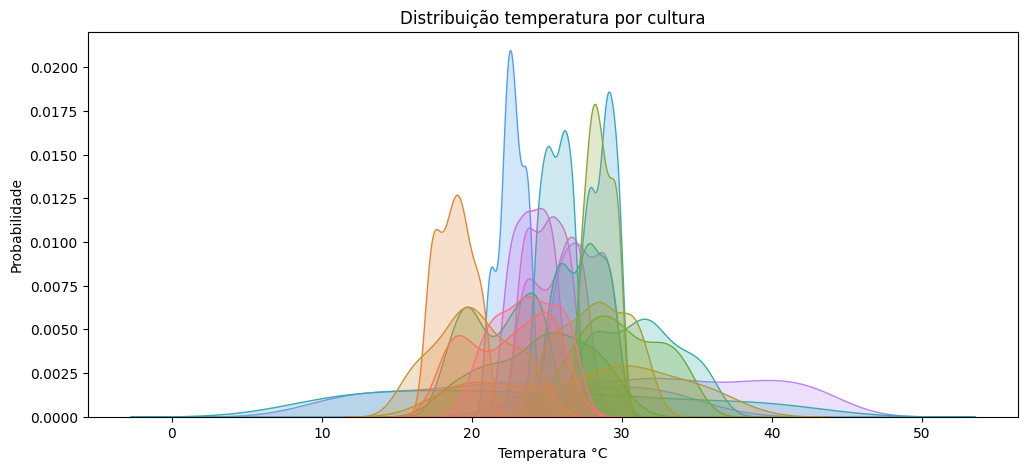

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(data = df, hue='label', x = 'temperature', fill = True, legend=False)
plt.title('Distribuição temperatura por cultura')
plt.xlabel('Temperatura °C')
plt.ylabel('Probabilidade')
plt.show()

Acima, podemos ter ideia das diferentes faixas de temperatura que cada cultura consegue ser produtiva. Como exemplos opostos, temos uma cultura que consegue sobreviver em uma faixa muito ampla de temperatura e algumas outras que só conseguem em uma faixa bem específica. Isso também se aplica aos demais parâmetros.

Abaixo, realizando a criação de cluster inicial para verificar como está o agrupamento.
Levando assim a pensar como podemos aprimorar para o desenvolvimento de determinadas situações

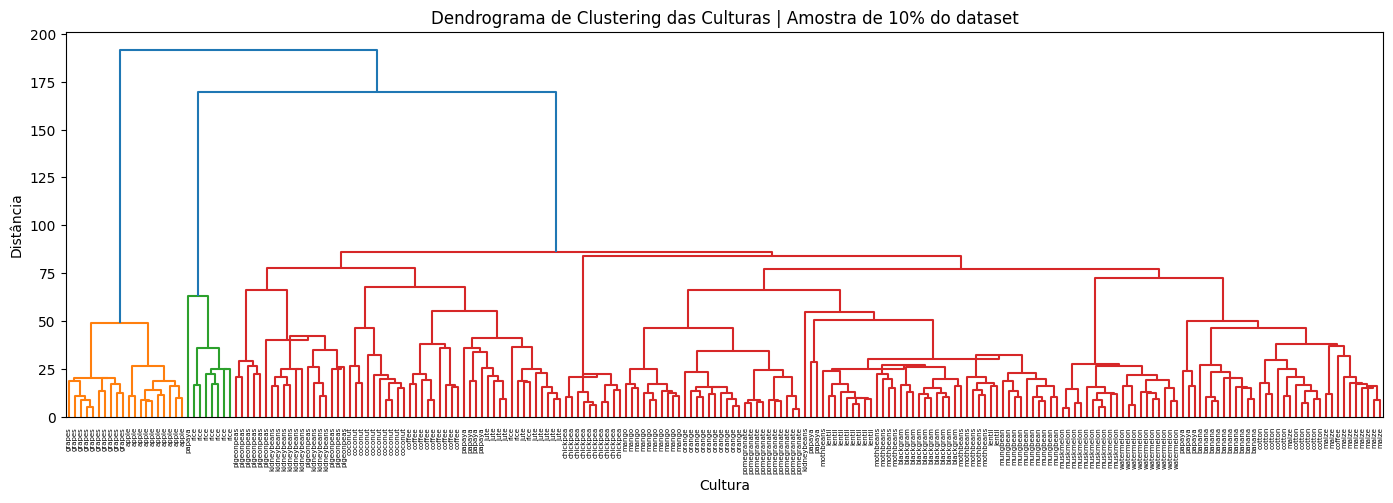

In [ ]:
pctamstr = 0.1
namstr = int(len(df) * pctamstr / ncult)
amstrEDA = df.groupby('label').apply(lambda x: x.sample(n=namstr)).reset_index(drop=True)

Z = linkage(amstrEDA[['N','P','K','temperature','humidity','ph','rainfall']], method='centroid', metric='euclidean')

plt.figure(figsize=(17, 5))
plt.title(f'Dendrograma de Clustering das Culturas | Amostra de {pctamstr:.0%} do dataset')
dendrogram(Z, labels=amstrEDA['label'].values)
plt.xlabel('Cultura')
plt.ylabel('Distância')
plt.show()

In [ ]:
labels = fcluster(Z, t=60, criterion='distance')
amstrEDA['cluster_id'] = labels # criando uma nova coluna no dataframe com os agrupamentos gerados

In [ ]:
amstrEDA.groupby('cluster_id')['label'].value_counts()

cluster_id  label      
1           apple          10
            grapes         10
2           rice            7
3           papaya          1
4           pigeonpeas      5
5           kidneybeans     9
            pigeonpeas      5
6           coconut        10
7           jute           10
            coffee          9
            papaya          4
            rice            3
8           chickpea       10
9           mango          10
            orange         10
            pomegranate    10
10          blackgram      10
            lentil         10
            mothbeans      10
            mungbean       10
            papaya          2
            kidneybeans     1
11          muskmelon      10
            watermelon     10
12          banana         10
            cotton         10
            maize          10
            papaya          3
            coffee          1
Name: label, dtype: int64

No agrupamento acima vemos que ao executar a clusterização com todas as colunas, foram gerados 12 agrupamentos. Observando o caso do 'rice' em específico, percebemos que ele se encontra vários clusters ao mesmo tempo.

Isso não necessáriamente quer dizer que há um erro, entretanto é um forte indício da necessidade de aprofundamento nos dados à luz do problema. Até porque consideramos um threshold sem muita ciência envolvida e os métodos de clusterização e métricas de distância não foram bem estudados para esse problema. Precisamos considerar outra categoria de agrupamentos sem ser da família dos métodos hierárquicos.

In [ ]:
'''
sns.pairplot(df)
plt.show()
'''

'\nsns.pairplot(df)\nplt.show()\n'

In [ ]:
'''
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['humidity'], y=df['P'], hue=df['label'])
plt.show()
'''

"\nplt.figure(figsize=(12,10))\nsns.scatterplot(x=df['humidity'], y=df['P'], hue=df['label'])\nplt.show()\n"